In [1]:
import SGPRE_funs as sg
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

In [2]:
t0=time.time()
sg.ODE(0.01/50, 5000, 0.01/50, 1, 1.3, 0.0002, 350)
t1=time.time()
sg.stack(0.01/50, 5000, 0.01/50, 1, 1.3, 0.0002, 350)
t2=time.time()
sg.th_opt(200/100000, 5000, 200/100000, 500, 310)
t3=time.time()
print(t1-t0,t2-t1,t3-t2)

0.007994890213012695 0.007005929946899414 0.39499807357788086


In [60]:
timefrac=[]
for x in range(1000):
    t0=time.time()
    sg.stack(0.01/50, 5000, 0.01/50, 1, 1.3, 0.0002, 350)
    t1=time.time()
    sg.stack_OLD(0.01/50, 5000, 0.01/50, 1, 1.3, 0.0002, 350)
    t2=time.time()
    #print(t1-t0,t2-t1)
    timefrac.append((t2-t1)/(t1-t0))
timefrac=np.array(timefrac)
print(timefrac.mean(),"+/-",timefrac.std())

3.0014820073937027 +/- 1.6900902360698065


In [3]:
sg.SGPRE (100/3600,2000,100/3600,100,323,0.22)

[61823.466415058676, 2.0, 27777.77777777777, 2.225644790942113]

In [4]:
t0=time.time()
sg.SGPRE (0.1,2000,0.1,100,323,0.22)
t1=time.time()
print(t1-t0)

1.8400516510009766


In [5]:
s_water= 1000 #ppm or mg/L fresh water nacl salinity?
s_water/=58.4  #ppm=mg/L to mmol/L 

s_brine=np.linspace(1,300,22) #g/L
s_brine*=1000    #mg/L
s_brine/=58.4    #mg/L to mmol/L

Tlist=np.linspace(10,80,21)

selist=np.linspace(0.01,1,11)

Emat=np.zeros([len(Tlist),len(s_brine),len(selist)])

In [ ]:
Elist=[]
  
for (i,t) in enumerate(Tlist):
    for (j,s) in enumerate(s_brine):
        for (k,se) in enumerate(selist):
            clear_output()
            print('(',i,',',j,',',k,')',end=', ')
            try: 
                E=sg.SGPRE (0.1,s,0.1,s_water,t+273,se)[0]
                E/=1e6
            except TypeError:
                E=np.nan

            Emat[i,j,k]=E

( 20 , 21 , 0 ), 

In [12]:
np.save("Emat",Emat)
np.load("Emat.npy")

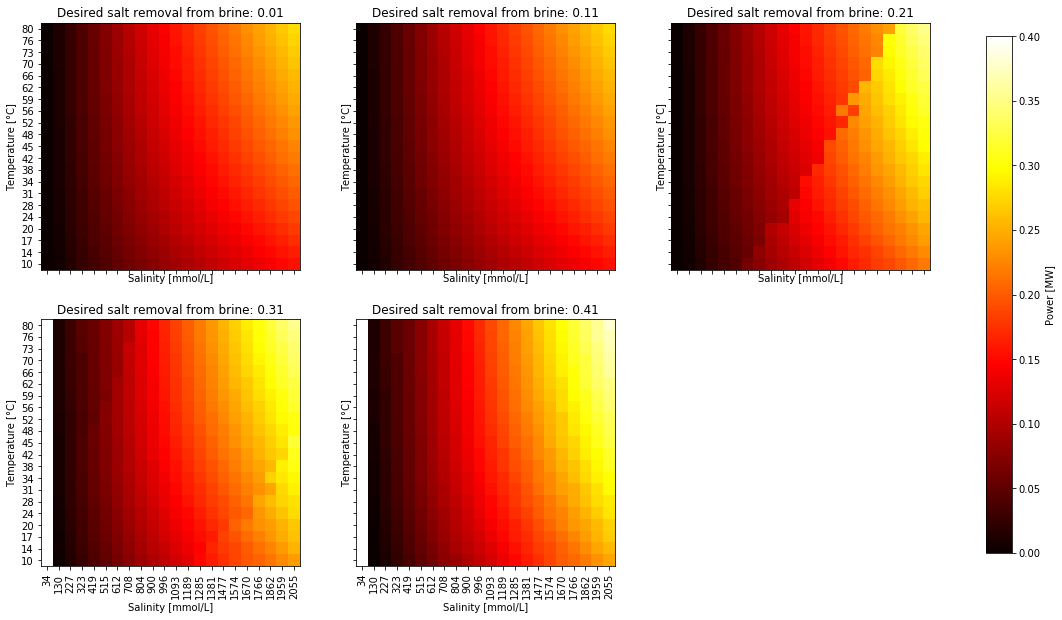

In [66]:
i=0
fig,ax=plt.subplots(nrows=2, ncols=3,figsize=(20,10),sharey=True,sharex=True);
ax[-1, -1].axis('off')

for i in range(5):
    Emat_i=Emat[:,:,i]
    im=ax.flat[i].imshow(Emat_i,cmap='hot', interpolation='nearest',vmin=0,vmax=0.4)
    # We want to show all ticks...
    ax.flat[i].set_xticks(np.arange(len(s_brine)))
    ax.flat[i].set_xticks(np.arange(len(s_brine)))
    ax.flat[i].set_xlabel("Salinity [mmol/L]")
    ax.flat[i].set_yticks(np.arange(len(Tlist)))
    ax.flat[i].set_ylabel("Temperature [°C]")
    ax.flat[i].invert_yaxis()
    ax.flat[i].set_title("Desired salt removal from brine: "+str(np.around(selist[i],2)))
    # ... and label them with the respective list entries
    ax.flat[i].set_xticklabels([int(x) for x in np.around(s_brine)], rotation = 90)
    ax.flat[i].set_yticklabels([int(x) for x in np.around(Tlist)]);
fig.colorbar(im,ax=ax.ravel().tolist(), shrink=0.95,label="Power [MW]")
plt.savefig("Power_from_salt_gradient_component.png")

In [23]:
selist[3]

0.30700000000000005

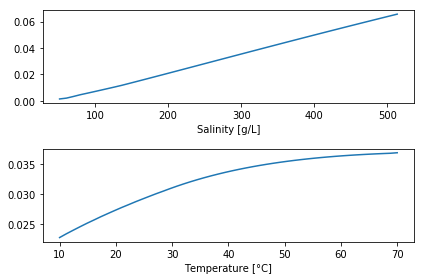

In [16]:
fig,ax=plt.subplots(2)
ax[0].plot(s_brine,Elist[:len(s_brine)])
ax[0].set_xlabel("Salinity [g/L]")
ax[0].set_xlabel("Power [MW]")
ax[1].plot(Tlist,Elist[len(s_brine):])
ax[1].set_xlabel("Power [MW]")
plt.tight_layout()